In [1]:
import numpy as np
import pandas as pd
from inspect_tables import (targhe, timestamp_names, plate_names,
                            veicoli, fatture, plot_date_relplot,
                            read_data, overview, draw_report, draw_correlation)
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
from matplotlib.colors import LogNorm, Normalize


pd.options.display.max_columns = 100

In [2]:
display(veicoli.head(2), fatture.head())

,N,Fabb.,Data Immatricolazione,Intestatario Libretto,"Titolo Di Possesso (N=Noleggio, L=Leasing, P=Proprieta, R=Riservato Dominio)",Disponibilita,Data Inizio Disponibilita,Data Fine Disponibilita,Data Scadenza Leasing/Riservato Dominio,Iscrizione Albo,Cat. Albo,Direttiva Ce,Euro,"F2 (Da Libretto), Massa Max Pieno Carico",Portata In Kg,Recupero Accise,Targa,N. Contratto Leasing,Alimentazione,Scadenza Tachigrafo,Prima Verifica Periodica Inail,Scadenza Verifica Periodica Inail,Matricola Inail/Ispesl,Cantiere,Vecchia Targa,Telaio,Capacita' Serbatoio,Card Carburante Ip,Sistema Gps Tracking,Seriale Black Box,Antenna I&S,Tag Id. I&S,Tipo,Automezzo,Allestimento,Tipo Attrezzatura,Volume Mc,Matricola Attrezzatura,4.0,Pesatura,Massa Max Qli.,Tara Veicolo Da Libretto,Iscrizione Albo2,Note,Scad. Revisione,Data Seduta Revisione,Contraente Assicuraz,Compagnia Assicuratrice,Scad. Assicuraz. Annuale,Stato Assicurazione,Data Sospensione,Scadenza Premio/Rata,Periodicita' Premio,Importo Annuale,Contratto Di Manutenzione,Km Ultimo Tagliando,Data,plate
0,181.0,2018.0,2019-03-14 00:00:00,Scania Finance Italy s.p.a.,L,si,NaT,NaT,2024-04-12,FV903SK,NaN,595/2009*627/2014C,6.0,18000.0,5220.0,SI,FV903SK,18001905.0,DIESEL,2021-03-15 00:00:00,NaN,N.A.,N.A.,NOVELLO,NaN,YS2P4X20009249086,300.0,7.000989e+18,SCANIAFLEET,NaN,NaN,NaN,COMPATTATORE,SCANIA N323 P280,TECNOINDUSTRIE,ZENIT 16,16.0,TIMP 44643/18,si,NaN,NaN,-5220,NaN,REVISIONE PRESSO TARDITI 04/10/21 ORE 14.00,2021-09-09 00:00:00,2021-10-04,Sea Eco,AXA,2021-12-31,ATTIVA,NaT,2021-06-30,sem.,2045.0,SI SCADENZA13/03/2023,NaN,NaN,FV903SK
0,181.0,2018.0,2019-03-14 00:00:00,Scania Finance Italy s.p.a.,L,si,NaT,NaT,2024-04-12,FV903SK,NaN,595/2009*627/2014C,6.0,18000.0,5220.0,SI,FV903SK,18001905.0,DIESEL,2021-03-15 00:00:00,NaN,N.A.,N.A.,NOVELLO,NaN,YS2P4X20009249086,300.0,7.000989e+18,MOVIMATICA,NaN,NaN,NaN,COMPATTATORE,SCANIA N323 P280,TECNOINDUSTRIE,ZENIT 16,16.0,TIMP 44643/18,si,NaN,NaN,-5220,NaN,REVISIONE PRESSO TARDITI 04/10/21 ORE 14.00,2021-09-09 00:00:00,2021-10-04,Sea Eco,AXA,2021-12-31,ATTIVA,NaT,2021-06-30,sem.,2045.0,SI SCADENZA13/03/2023,NaN,NaN,FV903SK


,ID,Targa,Telaio,Tipo_veicolo,Km,Apertura_commessa,Anno,Importo,Tipo_manutenzione,Manutenzione_struttura,Descrizione,Commenti
0,1,ZB134AR,JAANPR85HJ7100338,Mini_compattatore,3256.0,2019-09-16,2019,55.51,Ordinaria,Telaio,NaN,NaN
1,2,FV996FV,ZAPS90AGW00002639,Vasca,12767.0,2019-09-18,2019,163.31,Ordinaria,Telaio,NaN,NaN
2,3,FV997FV,ZAPS90AGW00002647,Vasca,9054.0,2019-09-18,2019,141.42,Ordinaria,Telaio,NaN,NaN
3,4,ZB150AR,JAANLR87EH7102953,Mini_compattatore,21117.0,2019-09-18,2019,171.20,Ordinaria,Telaio,NaN,NaN
4,5,EN971TN,ZAPS90CJW00001299,Vasca,115498.0,2019-09-19,2019,221.42,Ordinaria,Telaio,NaN,NaN


---
# General

In [3]:
pd.read_excel("excels/Sorgenti_dati.xlsx", index_col=[0,1]).reset_index().groupby(["nome fornitore", "folder"])["tipo dato "].count().reset_index()#.to_csv("tmp.csv")

,nome fornitore,folder,tipo dato
0,BSMART,Drivers,10
1,BSMART,Pump,34
2,BSMART,TankMovements,11
3,BSMART,Tanks,24
4,BSMART,Transactions,30
5,CGT I-SAT,Vehicle,24
6,COMAC,MachineDataLogEvent,16
7,EUROMASTER,getDossiers,44
8,IP,IpRifornimenti,52
9,MAN CAR SERVICE – RIO,truckState,60


In [3]:
read_data("dataset/MOVIMATICA_vehicles.csv")

,alarm_id,alarm_name,alarm_priority,alarm_tipology_id,alarm_tipology_label,box,brand,chassis,customId,engineHours,fleet_id,fleet_ilabel,hasTelemetry,id,lock_enabled,lock_locked,lock_status,model,name,odometer,plate,position_gps_lat,position_gps_lng,position_id,position_ignition,position_place_address,position_place_country_id,position_place_country_label,position_place_placeStr,position_place_state,position_place_zip,position_speed,position_timestamp,position_typology_id,position_typology_label,sav,typology_id,typology_label,filename,timestamp
0,0,NaN,0,NONE,NaN,D4257,Isuzu,TIS213369/18,NaN,4514,0,NaN,False,7425,True,False,disabled,M21,Isuzu M21,30349,ZB478AN,45.960472,8.421074,1060885110,False,Via Alfredo di Dio,IT,Italia,Ornavasso,Piemonte,28877.0,12,2021-05-11T09:34:28+02:00,digital_input_change,Cambio Digital IN,TIS213369/18,COMPACTOR,Compattatore,2021-05-11-17,2021-05-11
1,0,NaN,0,NONE,NaN,D4324,Isuzu,TIS283444/18,NaN,4426,0,NaN,False,7428,True,False,disabled,M21,Isuzu M21,37532,ZB476AN,45.960022,8.420602,1061115070,False,Via Alfredo di Dio,IT,Italia,Ornavasso,Piemonte,28877.0,0,2021-05-11T11:26:41+02:00,digital_input_change,Cambio Digital IN,TIS283444/18,COMPACTOR,Compattatore,2021-05-11-17,2021-05-11
2,0,NaN,0,NONE,NaN,D4314,Isuzu,TIS213368/18,NaN,3497,0,NaN,False,7430,True,False,disabled,M21,Isuzu M21,24933,ZB477AN,41.784200,12.301565,1061114233,False,Via del Macchione Rotondo,IT,Italia,Roma,Lazio,119.0,1,2021-05-11T11:20:15+02:00,digital_input_change,Cambio Digital IN,TIS213368/18,COMPACTOR,Compattatore,2021-05-11-17,2021-05-11
3,0,NaN,0,NONE,NaN,D6190,Isuzu,TIS433613/18,NaN,1395,0,NaN,False,9606,True,False,disabled,P75,Isuzu P75,63197,ZB127AR,44.585390,7.902978,1061318067,False,Località Piano 5,IT,Italia,Novello,Piemonte,12060.0,0,2021-05-11T12:40:38+02:00,external_power_on,Alimentazione ripristinata,TIS433613/18,COMPACTOR,Compattatore,2021-05-11-17,2021-05-11
6,0,NaN,0,NONE,NaN,D6220,Scania,TIMP44648/18,NaN,959,0,NaN,False,9741,True,False,disabled,P320,Scania P320,11308,FV914SK,45.947212,10.905164,1061560745,False,Località Matoni 1,IT,Italia,Dro,Trentino-Alto Adige,38074.0,1,2021-05-11T15:08:58+02:00,external_power_on,Alimentazione ripristinata,TIMP44648/18,COMPACTOR,Compattatore,2021-05-11-17,2021-05-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,0,NaN,0,NONE,NaN,D4296,Isuzu,TIS283441/18,NaN,1085,0,NaN,False,7404,True,False,disabled,M21,Isuzu M21,46044,ZB475AN,41.783962,12.301779,1258237450,False,Via del Macchione Rotondo,IT,Italia,Roma,Lazio,119.0,0,2021-09-22T11:02:27+00:00,digital_input_change,Cambio Digital IN,TIS283441/18,COMPACTOR,Compattatore,2021-09-22-13,2021-09-22
55,0,NaN,0,NONE,NaN,D4258,Isuzu,TIS283440/18,NaN,1081,0,NaN,False,7413,True,False,disabled,M21,Isuzu M21,51548,ZB474AN,45.960010,8.420666,1258445472,False,Via Alfredo di Dio,IT,Italia,Ornavasso,Piemonte,28877.0,0,2021-09-22T12:32:09+00:00,digital_input_change,Cambio Digital IN,TIS283440/18,COMPACTOR,Compattatore,2021-09-22-13,2021-09-22
57,0,NaN,0,NONE,NaN,D6250,Isuzu,TIS433614/18,NaN,2109,0,NaN,False,9720,True,False,disabled,P75,Isuzu P75,66974,ZB131AR,44.585163,7.903558,1257990994,False,Località Fasana,IT,Italia,Novello,Piemonte,12060.0,0,2021-09-22T09:46:01+00:00,anomaly,Anomalia,TIS433614/18,COMPACTOR,Compattatore,2021-09-22-13,2021-09-22
58,0,NaN,0,NONE,NaN,D4256,Isuzu,TIS283439/18,NaN,505,0,NaN,False,7417,True,False,disabled,M21,Isuzu M21,21263,ZB473AN,41.958744,12.697373,1249712972,False,Via degli Abeti,IT,Italia,Guidonia Montecelio,Lazio,12.0,0,2021-09-16T20:13:01+00:00,low_power,Basso consumo,TIS283439/18,COMPACTOR,Compattatore,2021-09-22-13,2021-09-16


In [179]:
timestamps = ["transaction_date", "Data", "creationDate", "position_timestamp", "snapshot_date_time", "PositionDateTime", "StartDate", "dateDay", "datestamp", "timestampCall", "DataTransazione", "start_timestamp"]
plates = ["license_plate", "LicensePlate", "vehiclePlate", "TruckPlate", "Targa", "registration_number"]
res_df = pd.DataFrame([])
num_df = fatture[fatture.Targa.isin(targhe)].groupby("Targa").ID.count().rename("fatture").to_frame()

for dt in tqdm(sorted(Path("dataset").glob("*csv"))):
    tmp = pd.read_csv(dt, low_memory=False)
    
    if not "plate" in tmp.columns:
        for p in plates:
            if p in tmp.columns: tmp["plate"] = tmp[p]
                
    if not "plate" in tmp.columns and "VIN" in tmp.columns:
        tmp = tmp.join(VIN_toplate, on="VIN")
        
    if "plate" in tmp.columns: tmp = tmp[tmp.plate.isin(targhe)]
    if len(tmp) == 0: continue
        
    for t in timestamps:
        try:
            if t in tmp.columns: tmp["timestamp"] = tmp[t]
        except ValueError:
            print(f"{dt.stem}: {tmp[t][:3]}")
        
    if "filename" in tmp.columns:
        tmp = tmp.drop("filename", axis=1)
    all_samp = tmp.shape[0]
    tmp = tmp.drop_duplicates()
    
    if "timestamp" in tmp.columns:
#         utc = True if dt.stem in ['MOVIMATICA_vehicles', 'MOVIMATICA_vehiclesTrip', 'VISIRUN_KpiSummary'] else False
        tmp.timestamp = pd.to_datetime(tmp.timestamp, utc=True).dt.tz_localize(None).dt.floor('D')
#         tmp.timestamp = pd.to_datetime(tmp.timestamp.dt.date)
        tmp.timestamp = tmp[tmp.timestamp.dt.year==2021].timestamp
        if "plate" in tmp.columns:
            tmp_fatture = fatture[(fatture.Apertura_commessa < tmp.timestamp.max())&(fatture.Apertura_commessa > tmp.timestamp.min())&(fatture.Targa.isin(tmp.plate.unique()))].groupby("Targa").ID.count()
            if len(tmp_fatture) == 0: tmp_fatture = None
        else:
            tmp_fatture = None
            
        date_range = (tmp.timestamp.max() - tmp.timestamp.min()).days 
    else:
        tmp_fatture = None
        date_range = None
    single_val = len([c for c in tmp.columns if len(tmp[c].unique()) <= 1])
    h_avail = len([c for c in tmp.columns if (tmp[c].isna().sum()+(tmp[c]=="").sum()) > .5*len(tmp)])
#     id_like = [c for c in tmp.columns if len(tmp[c].unique()) == len(tmp)]
    
    if "plate" in tmp.columns:
        num_df = num_df.join(tmp.groupby("plate").count()[tmp.columns[0]].rename(dt.stem))
        
    res_df = res_df.append({
        "nome fornitore": dt.stem.split("_")[0],
        "folder": dt.stem.split("_")[-1],
        "Tipo dato": None,
        "Veicoli monitorati": len(tmp.plate.unique()) if "plate" in tmp.columns else None,
        "Min Date": tmp[tmp.timestamp.dt.year==2021].timestamp.min().date() if "timestamp" in tmp.columns else None,
        "Max Date": tmp.timestamp.max().date() if "timestamp" in tmp.columns else None,
        "Samples": all_samp,
        "Samples diversi": tmp.shape[0],
        "Samples giornalieri /mezzo": tmp.shape[0] / (date_range * len(tmp.plate.unique())) if "plate" in tmp.columns and date_range else None,
        "Tot variabili": tmp.shape[1],
        "Nulle o costanti": single_val,
        "Half avail": h_avail,
        "Utilizzabili": tmp.shape[1] - h_avail - single_val,
        "Fatture associate":tmp_fatture.sum() if tmp_fatture is not None else None,
        "Mean fatture/mezzo": round(tmp_fatture.mean(), 2) if tmp_fatture is not None else None,
        "Max fatture/mezzo": tmp_fatture.max() if tmp_fatture is not None else None,
        "Targa associata": tmp_fatture.index[tmp_fatture.argmax()] if tmp_fatture is not None else None,
    }, ignore_index=True)

100%|██████████| 44/44 [01:18<00:00,  1.79s/it]


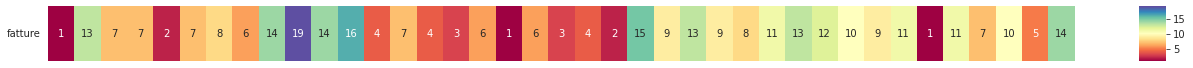

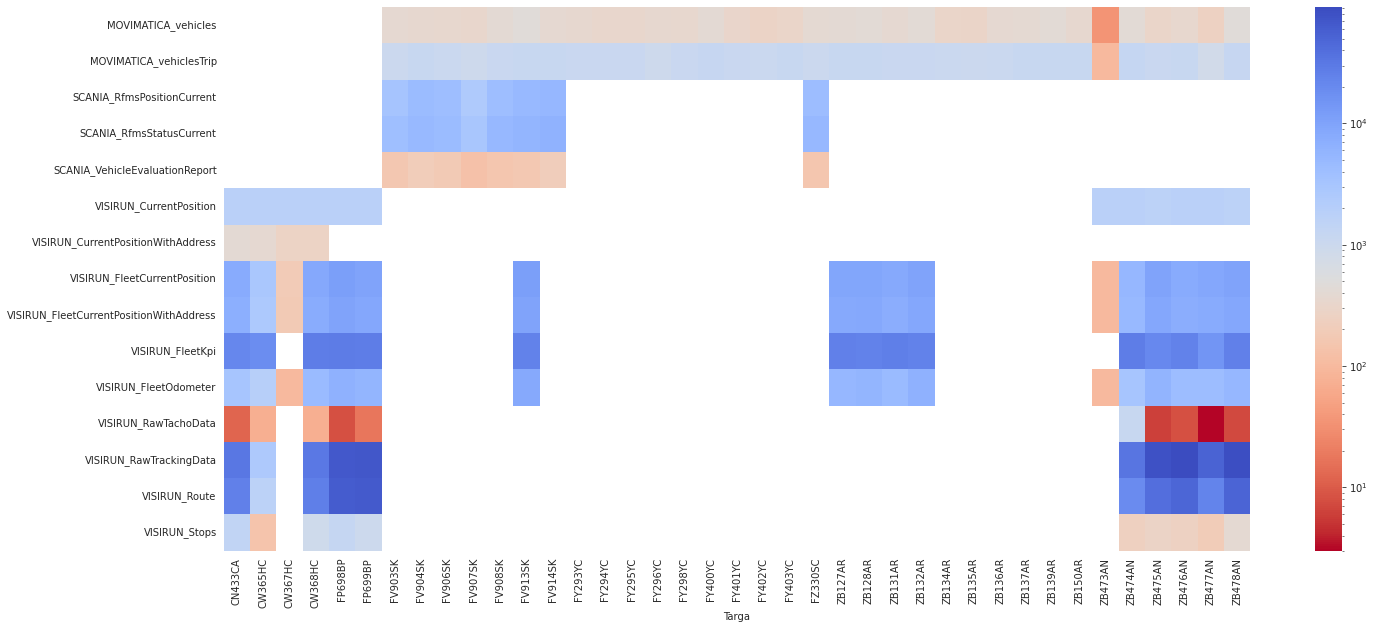

In [258]:
ignore_f = ["fatture", "BSMART_transactions", "EUROMASTER_GetDossiers", "IP", 'VISIRUN_FleetCurrentPositionWithAddressOLd', 'VISIRUN_FleetOdometerOld']
view = num_df[num_df.drop(ignore_f, axis=1).count(axis=1) > 0].drop(ignore_f, axis=1)

fig0, ax0 = plt.subplots(figsize=(23,1))
sns.heatmap(num_df[num_df.drop(ignore_f, axis=1).count(axis=1) > 0].fatture.to_frame().T,
            ax=ax0, cmap="Spectral", annot=True, cbar_kws={"aspect": 2}
           )
# ax0.get_xaxis().set_ticks([])
ax0.get_xaxis().set_visible(False)
ax0.tick_params(axis='y', rotation=0)
plt.show()

fig, ax = plt.subplots(figsize=(23,10))
sns.heatmap(view.T.sort_index(), ax=ax, norm=LogNorm(), cmap="coolwarm_r")
plt.show()

In [259]:
res_df.to_csv("data.csv")

---
## Euromaster

In [28]:
df_E = pd.read_csv("dataset/EUROMASTER_GetDossiers.csv", index_col=0)
for col in [c for c in df_E.columns if "date" in c.lower()]:
    df_E[col] = pd.to_datetime(df_E[col])
df_E = df_E[df_E.plate.isin(targhe)]

In [46]:
tmp = fatture[(fatture.Apertura_commessa < df_E.authorizationDate.max())&(fatture.Apertura_commessa > df_E.authorizationDate.min())].groupby("Targa").ID.count()
tmp.index[tmp.argmax()]

'FV903SK'

In [32]:
fatture.head()

,ID,Targa,Telaio,Tipo_veicolo,Km,Apertura_commessa,Anno,Importo,Tipo_manutenzione,Manutenzione_struttura,Descrizione,Commenti
0,1,ZB134AR,JAANPR85HJ7100338,Mini_compattatore,3256.0,2019-09-16,2019,55.51,Ordinaria,Telaio,NaN,NaN
1,2,FV996FV,ZAPS90AGW00002639,Vasca,12767.0,2019-09-18,2019,163.31,Ordinaria,Telaio,NaN,NaN
2,3,FV997FV,ZAPS90AGW00002647,Vasca,9054.0,2019-09-18,2019,141.42,Ordinaria,Telaio,NaN,NaN
3,4,ZB150AR,JAANLR87EH7102953,Mini_compattatore,21117.0,2019-09-18,2019,171.20,Ordinaria,Telaio,NaN,NaN
4,5,EN971TN,ZAPS90CJW00001299,Vasca,115498.0,2019-09-19,2019,221.42,Ordinaria,Telaio,NaN,NaN


In [31]:
df_E

,dossierId,dossierGuid,serviceProviderId,serviceProvider,fleetManagerId,fleetManager,fleetOwnerId,fleetOwner,depot,status,totalAmount,denialDate,cancelingDate,authorizationDate,sendingDate,creationDate,plate,closingDate,extpectedDelivery,authNumber,vehicle,ermNote,visitReason,sellOutTotalAmount,sellInTotalAmount,spTotalAmount,nextRecall,euromasterNumber,euromasterNumberString,invoiceDate,serviceProviderInvoiceDate,vehicleInternalNumber,cdsNote,fleetNote,isPending,isDirectSell,webcarDossierId,vehicleExpectedDelivery,legacyNumber,lastPartsRequestDate,lastPartsResponseDate,cdsInvoiceNumber,ermInvoiceNumber,orderNote
0,101116,b80a0fd6-95ee-42b2-a0a4-0037f6cddd5e,877,ERM SP,115,SEA SOLUZIONI ECO AMBIENTALI SRL,251,SEA SOLUZIONI ECO AMBIENTALI SRL,ROMA,3,0,NaT,NaT,2021-07-13 19:46:14.269,2021-07-13 19:46:14.269,2021-07-13 19:46:04.652928500,ZB477AN,NaT,NaN,NaN,M21,NaN,EP: ISPEZIONE COSTUMERCARE,5.00,0.0,0.0,NaN,99007,ERM-99007,NaT,NaT,149.0,NaN,NaN,False,False,0,2021-07-13T20:00:07,NaN,NaT,NaT,NaN,NaN,NaN
3,101112,99c95ade-61c0-42d6-8ae4-8a4c5b8cea97,877,ERM SP,115,SEA SOLUZIONI ECO AMBIENTALI SRL,251,SEA SOLUZIONI ECO AMBIENTALI SRL,ORNAVASSO,3,0,NaT,NaT,2021-07-13 19:19:34.012,2021-07-13 19:19:34.012,2021-07-13 19:19:24.412961000,ZB130AR,NaT,NaN,NaN,GEN,NaN,EP: ISPEZIONE COSTUMERCARE,10.00,0.0,0.0,NaN,99003,ERM-99003,NaT,NaT,NaN,NaN,NaN,False,False,0,2021-07-13T20:00:24,NaN,NaT,NaT,NaN,NaN,NaN
1,102843,b3b71515-6b49-4554-ba33-d22dab67c6eb,712,C.G. Service Spa-Gallarate,115,SEA SOLUZIONI ECO AMBIENTALI SRL,251,SEA SOLUZIONI ECO AMBIENTALI SRL,ORNAVASSO,2,0,2021-08-05 15:04:27.409,NaT,NaT,2021-08-05 15:08:45.092,2021-08-05 14:50:13.061795300,ZB135AR,NaT,2021-08-06T04:00:00,NaN,GEN,NaN,GOMME,1187.08,1135.7,1135.7,NaN,100734,ERM-100734,NaT,NaT,NaN,NaN,NaN,False,True,0,2021-08-19T16:50:03,NaN,NaT,NaT,NaN,NaN,NaN
0,101859,41c73b63-2057-4cd0-9b55-45c1bc026d9b,712,C.G. Service Spa-Gallarate,115,SEA SOLUZIONI ECO AMBIENTALI SRL,251,SEA SOLUZIONI ECO AMBIENTALI SRL,ORNAVASSO,3,0,NaT,NaT,2021-07-24 06:50:41.785,2021-07-24 06:50:41.785,2021-07-24 06:50:41.647828100,FV990FV,NaT,NaN,NaN,GEN,NaN,ispezione,5.00,4.5,4.5,NaN,99750,ERM-99750,NaT,NaT,NaN,NaN,NaN,False,False,0,2021-07-25T08:50:38,NaN,NaT,NaT,NaN,NaN,NaN
1,101857,b56604dc-4883-41be-8287-5a06b9a9bf0f,712,C.G. Service Spa-Gallarate,115,SEA SOLUZIONI ECO AMBIENTALI SRL,251,SEA SOLUZIONI ECO AMBIENTALI SRL,ORNAVASSO,3,0,NaT,NaT,2021-07-24 06:48:44.187,2021-07-24 06:48:44.187,2021-07-24 06:48:44.039943700,CW363HC,NaT,NaN,NaN,PORTER,NaN,ispezione,5.00,4.5,4.5,NaN,99748,ERM-99748,NaT,NaT,43.0,NaN,NaN,False,False,0,2021-07-25T08:48:41,NaN,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,99927,5ef3972f-57fc-4032-97d6-d30be213bdd6,712,C.G. Service Spa-Gallarate,115,SEA SOLUZIONI ECO AMBIENTALI SRL,251,SEA SOLUZIONI ECO AMBIENTALI SRL,ORNAVASSO,3,0,NaT,NaT,2021-06-29 14:13:34.343,2021-06-29 14:13:34.343,2021-06-29 14:13:34.426789900,FV997FV,NaT,NaN,NaN,GRN,NaN,ISPEZIONE,5.00,4.5,4.5,NaN,97822,ERM-97822,NaT,NaT,NaN,NaN,NaN,False,False,0,2021-06-30T16:13:31,NaN,NaT,NaT,NaN,NaN,NaN
8,99925,a4a2d59e-b9e4-415c-887a-599223c3500b,712,C.G. Service Spa-Gallarate,115,SEA SOLUZIONI ECO AMBIENTALI SRL,251,SEA SOLUZIONI ECO AMBIENTALI SRL,ORNAVASSO,3,0,NaT,NaT,2021-06-29 14:11:58.622,2021-06-29 14:11:58.622,2021-06-29 14:11:58.760653200,EN971TN,NaT,NaN,NaN,porter,NaN,ISPEZIONE,5.00,4.5,4.5,NaN,97820,ERM-97820,NaT,NaT,NaN,NaN,NaN,False,False,0,2021-06-30T16:11:46,NaN,NaT,NaT,NaN,NaN,NaN
9,99923,be4918c3-debf-4f2b-a007-8f1262f781b5,712,C.G. Service Spa-Gallarate,115,SEA SOLUZIONI ECO AMBIENTALI SRL,251,SEA SOLUZIONI ECO AMBIENTALI SRL,ORNAVASSO,3,0,NaT,NaT,2021-06-29 14:10:04.727,2021-06-29 14:10:04.727,2021-06-29 14:10:04.778298800,FV991FV,NaT,NaN,NaN,GEN,NaN,ISPEZIONE,5.00,4.5,4.5,NaN,97818,ERM-97818,NaT,NaT,NaN,NaN,NaN,False,False,0,2021-06-30T16:10:01,NaN,N

In [30]:
df_E.plate.drop_duplicates().join()

0     ZB477AN
3     ZB130AR
1     ZB135AR
0     FV990FV
1     CW363HC
2     FV991FV
3     FV988FV
4     FV996FV
5     FV997FV
6     FV985FV
8     FV989FV
2     FY295YC
3     FY402YC
4     FV914SK
5     FV906SK
2     FV994FV
5     FV986FV
6     FV993FV
0     ZB478AN
0     ZB134AR
1     FY293YC
0     ZB136AR
1     ZB132AR
2     ZB131AR
3     FY400YC
5     FV903SK
24    ZB128AR
33    FP698BP
7     ZB127AR
15    CN433CA
0     FV992FV
1     FV904SK
2     FV913SK
3     FV908SK
10    FZ330SC
19    FV907SK
4     EN971TN
22    ZB137AR
23    ZB474AN
24    ZB139AR
26    ZB150AR
27    ZB476AN
0     FP699BP
Name: plate, dtype: object

In [16]:
df_E, _ = overview(df_E, timestamp="creationDate", fatture=fatture)

    Dati raccolti tra 06/2021 e 09/2021
    44 parametri totali monitorati
    103 record nel datalake
    103 record non ripetuti
    43 truck monitorati
    In media 2.395348837209302 misurazioni per ogni mezzo su 5 mesi
    In media 0.03281299776999044 misurazioni/giorno/mezzo (dettaglio successivamente)
    416 fatture associate.

Misurazioni con valore singolo:
fleetManagerId                                        115
fleetManager             SEA SOLUZIONI ECO AMBIENTALI SRL
fleetOwnerId                                          251
fleetOwner               SEA SOLUZIONI ECO AMBIENTALI SRL
totalAmount                                             0
authNumber                                            NaN
ermNote                                               NaN
invoiceDate                                           NaT
cdsNote                                               NaN
fleetNote                                             NaN
isPending                                          

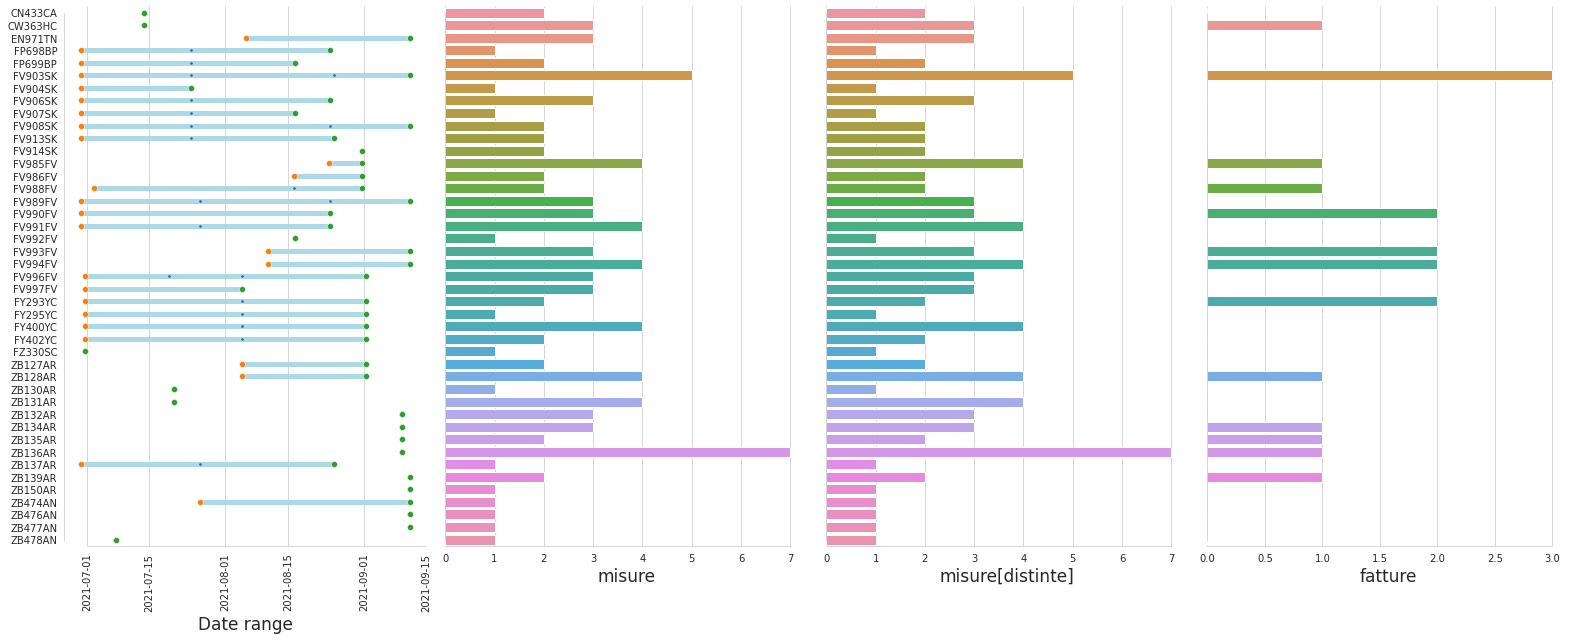

In [7]:
draw_report(df_E, timestamp="creationDate", fatture=fatture, per_day=False)

In [8]:
df_E[df_E.plate == "zb136ar".upper()]

,dossierId,dossierGuid,serviceProviderId,serviceProvider,depot,status,denialDate,cancelingDate,authorizationDate,sendingDate,creationDate,plate,closingDate,extpectedDelivery,vehicle,visitReason,sellOutTotalAmount,sellInTotalAmount,spTotalAmount,nextRecall,euromasterNumber,euromasterNumberString,serviceProviderInvoiceDate,vehicleInternalNumber,isDirectSell,vehicleExpectedDelivery
29,100119,dbce457e-d6c7-487f-977b-67a00a018cf5,721,CASASOLA GOMME SNC - Via Cuneo,ORNAVASSO,2,NaT,NaT,NaT,2021-06-30 15:49:39.360,2021-06-30 15:45:26.195832600,ZB136AR,NaT,NaN,A,EP: RISCOLPITURA,140.00,130.0,130.0,NaN,98014,ERM-98014,NaT,NaN,False,2021-06-30T17:49:33
34,100087,af3221ca-f677-4b03-a2c7-382be9eeada9,877,ERM SP,ORNAVASSO,5,NaT,NaT,2021-06-30 12:15:38.380,2021-06-30 12:15:38.380,2021-06-30 14:15:35.800442000,ZB136AR,2021-06-30 14:22:17.574,NaN,A,EP: ISPEZIONE MASTERCARE,10.00,0.0,0.0,2021-07-29T22:00:00,97982,ERM-97982,NaT,NaN,False,2021-06-30T16:15:33
41,104512,c4251ddf-0111-4df5-94eb-b885a313cd98,721,CASASOLA GOMME SNC - Via Cuneo,ORNAVASSO,2,NaT,NaT,NaT,2021-09-01 12:59:22.224,2021-09-01 12:53:51.034211800,ZB136AR,NaT,NaN,A,EP: SOSTITUZIONE,1118.82,1047.2,233.0,NaN,102400,ERM-102400,NaT,NaN,False,2021-09-01T14:59:17
42,104510,02812120-106b-4d6a-91e2-a0b4779eb139,1574,3 ZETACI SRL,ORNAVASSO,6,NaT,2021-09-01 13:00:03.997,NaT,2021-09-01 10:56:11.088,2021-09-01 12:50:40.031083800,ZB136AR,NaT,NaN,A,EP: SOSTITUZIONE,1118.82,1030.0,215.8,NaN,102398,ERM-102398,NaT,NaN,False,2021-09-01T14:56:06
43,104509,d84b4927-c608-4b8e-9a71-d96a274c748e,877,ERM SP,ORNAVASSO,5,NaT,NaT,2021-09-01 12:54:01.480,2021-09-01 12:54:01.480,2021-09-01 12:48:30.272966800,ZB136AR,2021-09-01 12:54:04.550,NaN,A,EP: ISPEZIONE MASTERCARE,10.00,0.0,0.0,2021-10-31T13:54:02.797,102397,ERM-102397,NaT,NaN,False,2021-09-01T14:53:58
59,102777,0f3fb8c2-ad99-4ca0-abf6-aef63cc720b2,877,ERM SP,ORNAVASSO,5,NaT,NaT,2021-08-04 16:28:19.188,2021-08-04 16:28:19.188,2021-08-04 16:23:21.939964400,ZB136AR,2021-08-04 16:28:22.558,NaN,A,EP: ISPEZIONE MASTERCARE,10.00,0.0,0.0,2021-10-03T16:28:20.713,100668,ERM-100668,NaT,NaN,False,2021-08-04T18:28:16
90,101451,dda6dd06-dfed-4059-b15a-22c70e338f8f,721,CASASOLA GOMME SNC - Via Cuneo,ORNAVASSO,5,NaT,NaT,2021-07-19 07:45:01.694,2021-07-19 04:38:15.067,2021-07-19 08:38:14.124709100,ZB136AR,2021-07-19 10:17:59.398,NaN,A,soccorso,107.00,100.5,100.5,2021-07-28T22:00:00,99342,ERM-99342,NaT,NaN,False,2021-07-19T10:38:05


In [10]:
df_E[df_E.nextRecall.isna()][["visitReason", "status"]]

,visitReason,status
0,EP: ISPEZIONE COSTUMERCARE,3
1,EP: ISPEZIONE COSTUMERCARE,3
2,GOMME,2
3,ispezione,3
4,ispezione,3
5,ispezione,3
6,ispezione,3
7,ispezione,3
8,ispezione,3
9,ispezione,3


Text(0.5, 0, 'giorni')

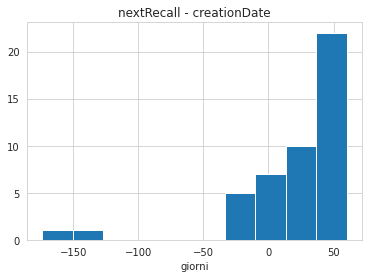

In [11]:
tmp = (pd.to_datetime(df_E.nextRecall) - df_E.creationDate).dt.days.hist()
plt.title("nextRecall - creationDate")
plt.xlabel("giorni")

In [12]:
df_E["delta_nextRecall"] = (pd.to_datetime(df_E.nextRecall) - df_E.creationDate).dt.days
df_E[df_E.delta_nextRecall < 0][["delta_nextRecall", "visitReason"]].reset_index(drop=True)

,delta_nextRecall,visitReason
0,-145.0,MANUTENZIONE ORDINARIA
1,-32.0,MANUTENZIONE ORDINARIA
2,-174.0,Manutenzione ordinaria
3,-26.0,AF: PERMUTA
4,-26.0,AF: PERMUTA
5,-12.0,COSTI TRASPORTO COME DA ACCORDI
6,-12.0,Sostituzione 2 pneumatici


<AxesSubplot:>

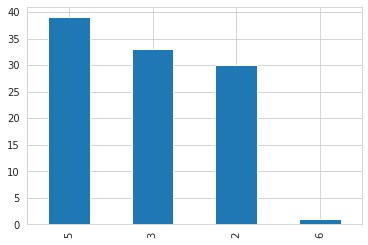

In [18]:
df_E.status.value_counts().plot(kind="bar")

---
## GCT

In [4]:
df_G = pd.read_csv("dataset/CGTISAT_INFO.csv", index_col=0)
df_G.Data = pd.to_datetime(df_G.Data)
df_G.head()

,vehicleName,lat,lon,sim,Data,Quadro,Motore,Velocita,Direzione,GPS,Operatore,ContaKm,ContaOre,Batteria,PressioneOlioMotore,TempRefrigeranteMotore,TempOlioIdraulica,StatoRigenerazioneDPF,LivelloCarburante,CarburanteUsato,Consumo,ProssimoTagliando,ChiaveElettronica,BloccoMotore
0,908M K5801248,45.07673,7.68253,393206872591,2021-05-17 07:51:39,Spento,Spento,0Km/h,E (79°),Posizione valida,2,1713Km,550h,"12,6V",200KPa,73°C,29°C,Spento,92%,1888Lt,"3,4Lt/h",-h,Attiva,Spento
1,908M K5801248,45.07671,7.68249,393206872591,2021-08-25 19:48:22,Spento,Spento,1Km/h,O (249°),Ultima posizione,2,2781Km,859h,"13,0V",200KPa,76°C,53°C,Spento,100%,2976Lt,"3,5Lt/h",-h,Attiva,Spento
2,908M K5801248,45.07674,7.68264,393206872591,2021-08-27 01:17:41,Spento,Spento,0Km/h,SE (102°),Ultima posizione,2,2789Km,862h,"12,8V",200KPa,77°C,57°C,Spento,96%,2985Lt,"3,5Lt/h",-h,Attiva,Spento
3,908M K5801248,45.07665,7.68314,393206872591,2021-04-06 13:39:12,Spento,Spento,1Km/h,SE (131°),Ultima posizione,2,1906Km,609h,"12,7V",200KPa,76°C,55°C,Spento,99%,2094Lt,"3,4Lt/h",-h,Attiva,Spento
4,908M K5801248,45.07675,7.68269,393206872591,2021-05-31 19:33:18,Spento,Spento,1Km/h,N (334°),Ultima posizione,2,1877Km,600h,"13,1V",200KPa,73°C,54°C,Spento,64%,2061Lt,"3,4Lt/h",-h,Attiva,Spento


In [5]:
df_G.vehicleName.unique()

array(['908M K5801248'], dtype=object)

In [6]:
df_G, useless_G = overview(df_G, plate="vehicleName", timestamp="Data", fatture=fatture)

    Dati raccolti tra 01/2021 e 12/2021
    24 parametri totali monitorati
    565 record nel datalake
    560 record non ripetuti
    1 truck monitorati
    In media 565.0 misurazioni per ogni mezzo su 5 mesi
    In media 1.6765578635014837 misurazioni/giorno/mezzo (dettaglio successivamente)
    0 fatture associate.

Misurazioni con valore singolo:
vehicleName            908M K5801248
sim                     393206872591
PressioneOlioMotore           200KPa
ChiaveElettronica             Attiva
BloccoMotore                  Spento
Name: 0, dtype: object
--> Colonne eliminate


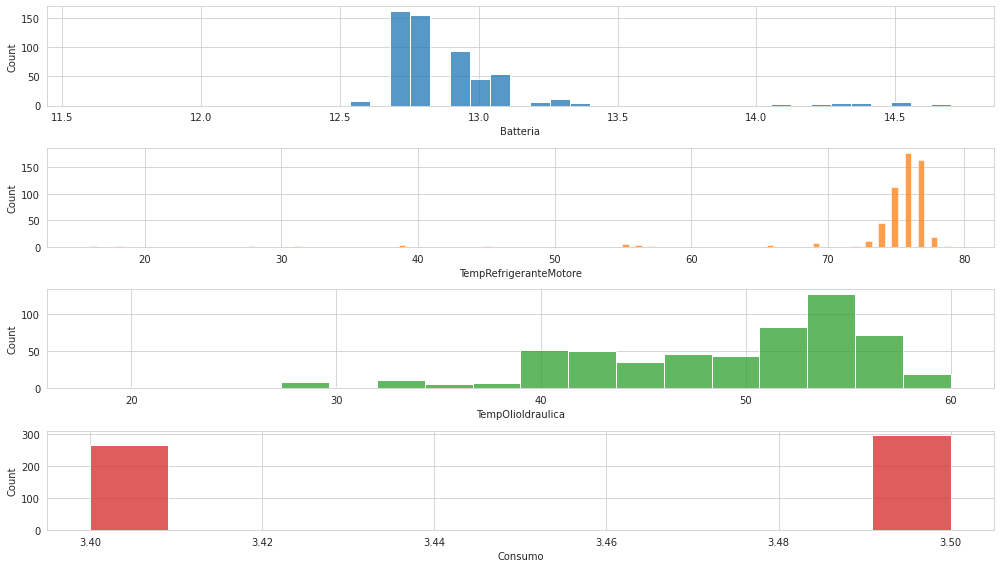

In [7]:
fig, ax = plt.subplots(4, 1, figsize=(14, 8))
for i, c in enumerate(["Batteria", "TempRefrigeranteMotore", "TempOlioIdraulica", "Consumo"]):
    df_G[f"{c}_v"] = df_G[c].str.replace(",", ".").str.extract('(\d+(?:.\d+)?)').astype(float)
    sns.histplot(data=df_G, x=f"{c}_v", ax=ax[i], color=sns.color_palette()[i])
    ax[i].set_xlabel(c)
plt.tight_layout()
# df_G.drop_duplicates()[["Batteria_v", "TempRefrigeranteMotore_v", "TempOlioIdraulica_v", "Consumo_v"]].plot(kind="hist")

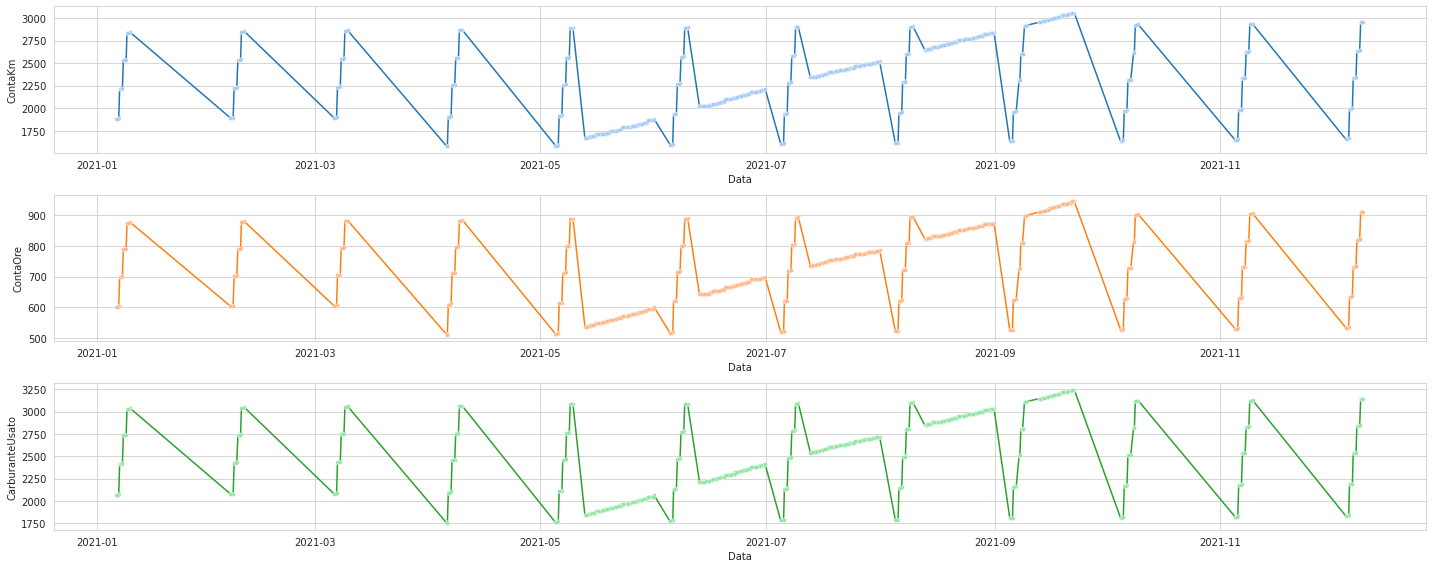

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(20, 8))
for i, c in enumerate(["ContaKm","ContaOre", "CarburanteUsato"]):
    df_G[f"{c}_v"] = df_G[c].str.extract('(\d+(?:.\d+)?)').astype(float)
    sns.lineplot(data=df_G, x="Data", y=f"{c}_v", ax=ax[i], color=sns.color_palette()[i], zorder=1)
    sns.scatterplot(data=df_G, x="Data", y=f"{c}_v", ax=ax[i], color=sns.color_palette("pastel")[i], zorder=2, s=14)
    ax[i].set_ylabel(c)
plt.tight_layout()


NameError: name 'g' is not defined

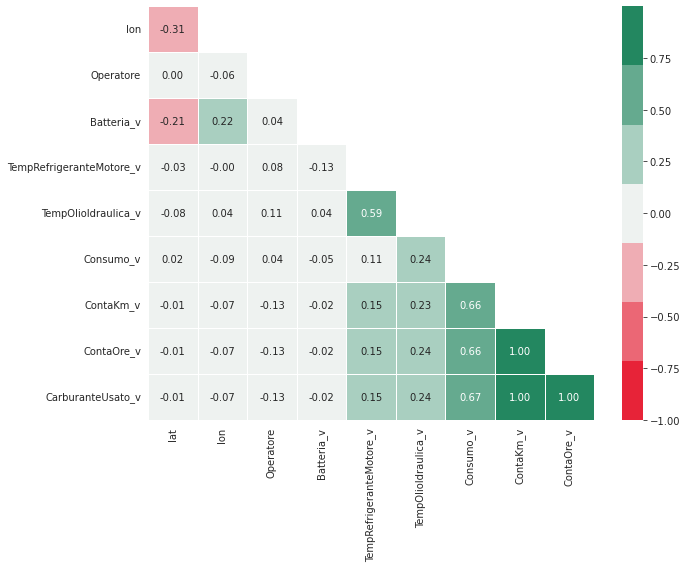

In [10]:
draw_correlation(df_G)

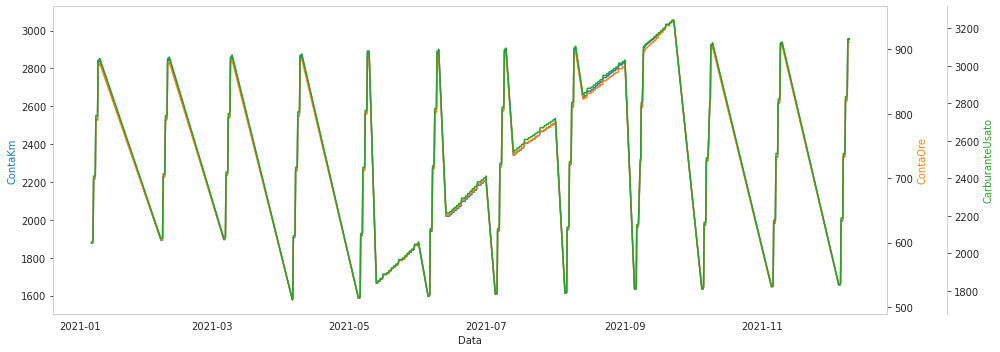

In [114]:
fig, a = plt.subplots(figsize=(14, 5))

ax = np.array([a, a.twinx(), a.twinx()])

for i, c in enumerate(["ContaKm","ContaOre", "CarburanteUsato"]):
    df_G[f"{c}_v"] = df_G[c].str.extract('(\d+(?:.\d+)?)').astype(float)
    sns.lineplot(data=df_G, x="Data", y=f"{c}_v", ax=ax[i], color=sns.color_palette()[i])
    ax[i].set_ylabel(c)
    ax[i].yaxis.label.set_color(sns.color_palette()[i])
    ax[i].grid(False)
#     sns.despine(trim=True, left=False, ax=ax[i])

ax[-1].spines['right'].set_position(('outward', 60))
# plt.legend()
plt.tight_layout()


(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

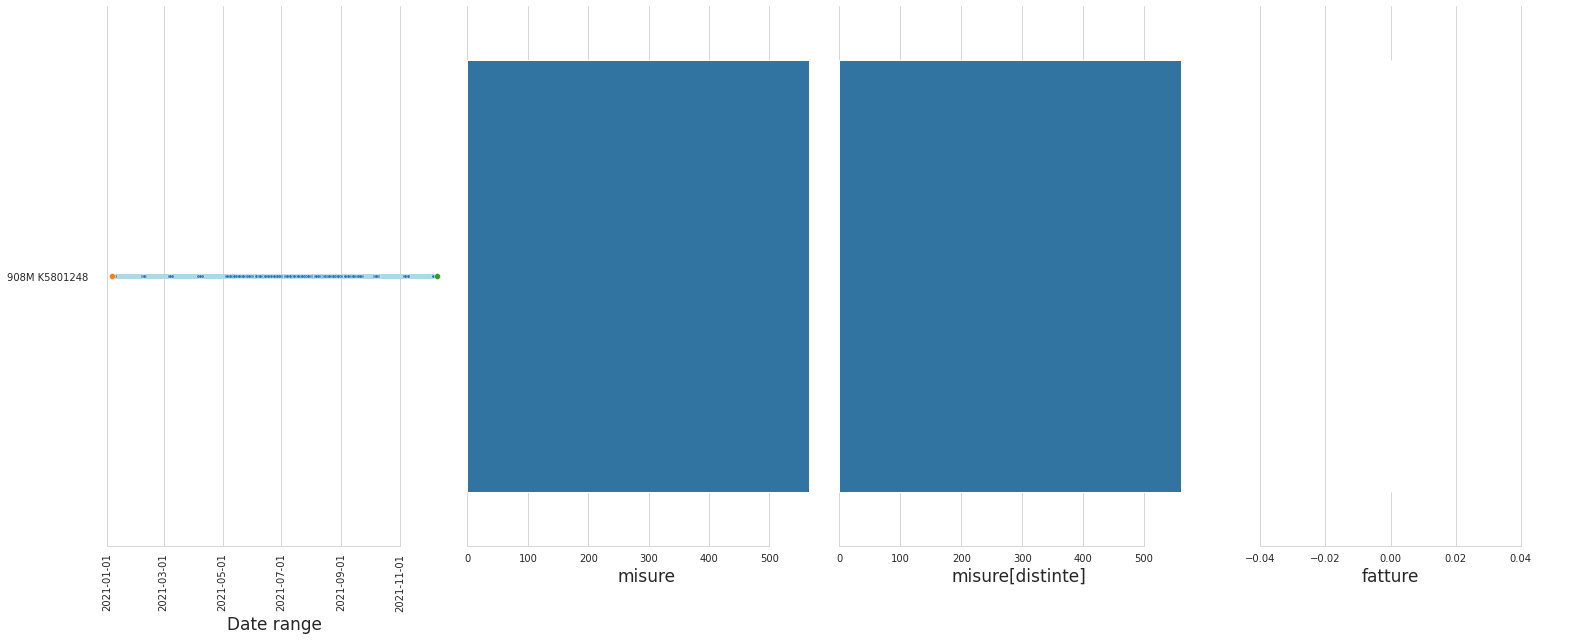

In [15]:
draw_report(df_G, plate="vehicleName", timestamp="Data", fatture=fatture, per_day=True)

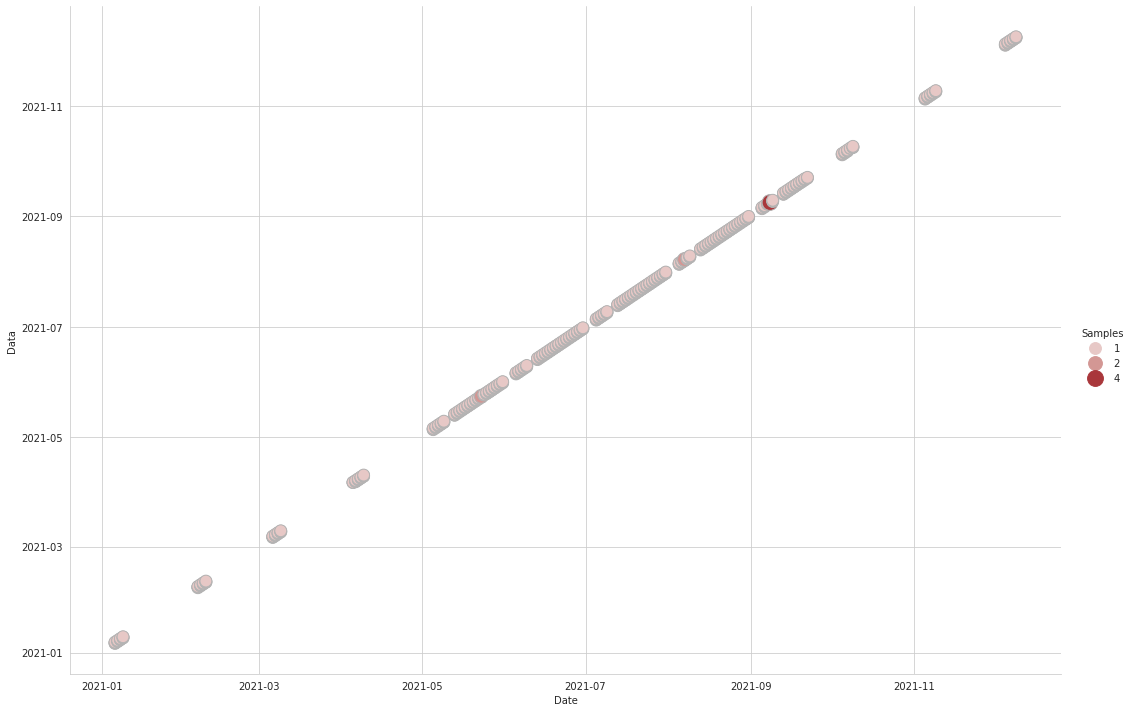

In [7]:
g = plot_date_relplot(df_G, plate="Data", timestamp="Data")

In [18]:
df_G.ProssimoTagliando.unique()

array(['-h', nan], dtype=object)